In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('adult.data', sep=',', skipinitialspace=True, names=['age','workclass','fnlwgt','education',
    'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss',
                                                                        'hours-per-week','native-country','>50K, <=50K'])
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
data1 = pd.read_csv('adult.names', sep='|', engine = 'python')
data1.iloc[91:]

,Unnamed: 0,This data was extracted from the census bureau database found at
91,">50K, <=50K.",None
92,age: continuous.,None
93,"workclass: Private, Self-emp-not-inc, Self-emp...",None
94,fnlwgt: continuous.,None
95,"education: Bachelors, Some-college, 11th, HS-g...",None
96,education-num: continuous.,None
97,"marital-status: Married-civ-spouse, Divorced, ...",None
98,"occupation: Tech-support, Craft-repair, Other-...",None
99,"relationship: Wife, Own-child, Husband, Not-in...",None
100,"race: White, Asian-Pac-Islander, Amer-Indian-E...",None


# 1. How many males and females are there?

In [6]:
data.groupby('sex')['sex'].count()

sex
Female    10771
Male      21790
Name: sex, dtype: int64

# What is the mean male age?

In [7]:
data[data['sex'] == 'Male'].groupby('sex')['age'].mean()

sex
Male    39.433547
Name: age, dtype: float64

# 3. What is the proportion of the US citizens?

In [8]:
len(data[data['native-country'] == 'United-States'])/len(data)

0.895857006848684

# 4. Plot the distribution of people's education as a bar plot.

<BarContainer object of 16 artists>

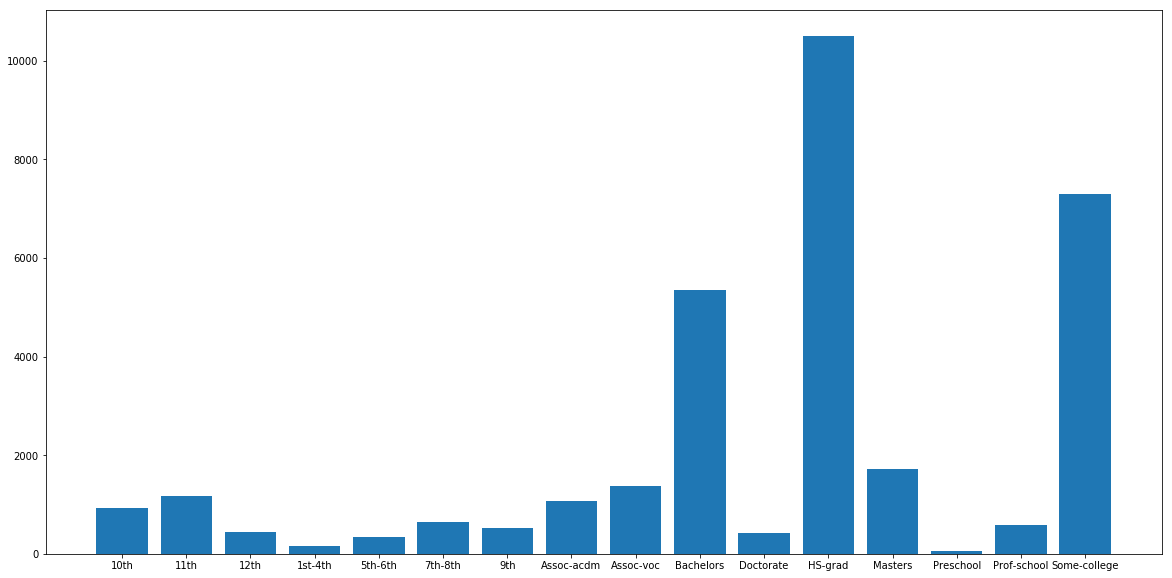

In [9]:
plt.figure(figsize=(20,10))
plt.bar(data.groupby('education')['education'].count().index, data.groupby('education')['education'].count().values)

# 5. What is the mean and standard deviation of the "final weight" for divorced people?

In [10]:
data[data['marital-status'] == 'Divorced']['fnlwgt'].mean()

185802.79045689848

In [11]:
data[data['marital-status'] == 'Divorced']['fnlwgt'].std()

105646.78945933603

# 6. Is it true that the people who receive over 50k are mostly highly educated?

In [12]:

data[data['>50K, <=50K'] == '>50K'].groupby('education')['education'].count()

education
10th              62
11th              60
12th              33
1st-4th            6
5th-6th           16
7th-8th           40
9th               27
Assoc-acdm       265
Assoc-voc        361
Bachelors       2221
Doctorate        306
HS-grad         1675
Masters          959
Prof-school      423
Some-college    1387
Name: education, dtype: int64

In [13]:
total_num = 0
for el in data[data['>50K, <=50K'] == '>50K'].groupby('education')['education'].count().values:
    total_num += el 
over50_num = 265 + 361 + 2221 + 306 + 959 + 423 + 1387  #могу ошибаться с отнесением к высшему образованию, но не суть...
print("Отношение людей с высшим образованием к общему числу людей: ",over50_num / total_num)
print("Ответ: ",over50_num / total_num > 0.5)

Отношение людей с высшим образованием к общему числу людей:  0.7552608085703354
Ответ:  True


# 7. What is the maximum male and female age for each race?

In [14]:
data.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

# 8. The people from which countries work as farmers/fishers?

In [15]:
data[data['occupation'] == 'Farming-fishing'].groupby('native-country')['native-country'].count()

native-country
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
Name: native-country, dtype: int64

In [16]:
data[data['occupation'] == 'Farming-fishing'].groupby('native-country')['native-country'].count().index

Index(['?', 'Cambodia', 'Canada', 'Cuba', 'El-Salvador', 'England', 'France',
       'Germany', 'Guatemala', 'Hong', 'Ireland', 'Italy', 'Japan', 'Mexico',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'United-States',
       'Vietnam', 'Yugoslavia'],
      dtype='object', name='native-country')

# 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [17]:
len(data.loc[data['sex'] == 'Male'].loc[data['education'] == 'Bachelors']) / len(data.loc[data['sex'] == 'Male'].loc[data['education'] == 'Masters'])

3.14743049705139

In [18]:
len(data.loc[data['sex'] == 'Female'].loc[data['education'] == 'Bachelors']) / len(data.loc[data['sex'] == 'Female'].loc[data['education'] == 'Masters'])

3.0205223880597014

In [19]:
print('1) > 2)')

1) > 2)


# 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [20]:
data['hours-per-week'].max()

99

In [21]:
len(data.loc[data['hours-per-week'] == data['hours-per-week'].max()])

85

In [22]:
data.loc[data['hours-per-week'] == data['hours-per-week'].max()]['>50K, <=50K']

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: >50K, <=50K, Length: 85, dtype: object